In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [44]:
def get_gamma_traj_list(dir_name, dataset, opt, precond):
    path = os.path.join(dir_name, dataset, opt, precond)
    data =  np.load(os.path.join(path, 'gamma_traj_list.npz'))
    traj_list = data['arr_0']
    data.close()
    return traj_list

In [45]:
def get_gamma_glob_list(dir_name, dataset, opt, precond):
    path = os.path.join(dir_name, dataset, opt, precond)
    data =  np.load(os.path.join(path, 'gamma_glob_list.npz'))
    glob_list = data['arr_0']
    data.close()
    return glob_list

In [46]:
def get_gamma_u_l_list(dir_name, dataset, opt, precond):
    path = os.path.join(dir_name, dataset, opt, precond)
    data =  np.load(os.path.join(path, 'gamma_glob_u_list.npz'))
    u_list = data['arr_0']
    data.close()
    data =  np.load(os.path.join(path, 'gamma_glob_l_list.npz'))
    l_list = data['arr_0']
    data.close()
    return u_list, l_list

In [47]:
# Number of training samples (hardcoded + accounting for 80/20 split)
# ntr_dict = {'a9a': 32561, 'ijcnn1': 49990, 'rcv1': 20242, 'real-sim': 57847, 'w8a': 49749}

In [48]:
# dir_name = '../regularity_results'
# dataset = 'a9a'
# dataset = 'ijcnn1'
# dataset = 'rcv1'
# dataset = 'real-sim'
# dataset = 'w8a'
# opt = 'sketchysaga'
# precond = 'nystrom'
bg = 256 # batch size for stochastic gradients

In [49]:
# gamma_traj = get_gamma_traj_list(dir_name, dataset, opt, precond)
# plt.plot(np.arange(gamma_traj.shape[0]) * bg/ntr_dict[dataset], gamma_traj)
# plt.xlabel('Epochs')
# plt.ylabel(r'$\gamma$')
# plt.title('$\gamma$ along trajectory')

In [50]:
# gamma_glob = get_gamma_glob_list(dir_name, dataset, opt, precond)
# plt.plot(np.arange(gamma_glob.shape[0]) * bg/ntr_dict[dataset], gamma_glob)
# plt.xlabel('Epochs')
# plt.ylabel(r'$\gamma$')
# plt.title('$\gamma$ w.r.t. optimum')

In [51]:
# gamma_u_list, gamma_l_list = get_gamma_u_l_list(dir_name, dataset, opt, precond)
# gamma_u_list = np.array(gamma_u_list)
# gamma_l_list = np.array(gamma_l_list)

# eps_list = np.maximum(gamma_u_list - 1, gamma_l_list ** (-1) - 1)

# plt.figure()
# plt.plot(gamma_u_list, label=r'$\gamma_u$')
# plt.plot(gamma_l_list, label=r'$\gamma_\ell$')
# plt.xlabel('Epochs')
# plt.title(r'$\gamma_u$ and $\gamma_\ell$')
# plt.legend()

# plt.figure()
# plt.plot(gamma_u_list / gamma_l_list)
# plt.xlabel('Epochs')
# plt.ylabel(r'$\gamma_u / \gamma_\ell$')
# plt.title('Local conditioning')

# plt.figure()
# plt.plot(eps_list)
# plt.xlabel('Epochs')
# plt.ylabel(r'$\epsilon$')
# plt.title('Local adiabaticity')

# fig, ax1 = plt.subplots()
# color = 'tab:orange'
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel(r'$\gamma_u / \gamma_\ell$', color=color)
# ax1.plot(gamma_u_list / gamma_l_list, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:blue'
# ax2.set_ylabel(r'$\gamma$', color=color)  # we already handled the x-label with ax1
# ax2.plot(np.arange(gamma_glob.shape[0]) * bg/ntr_dict[dataset], gamma_glob, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.title(r'Local conditioning and global $\gamma$')

# fig, ax1 = plt.subplots()
# color = 'tab:orange'
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel(r'$\epsilon$', color=color)
# ax1.plot(eps_list, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:blue'
# ax2.set_ylabel(r'$\gamma$', color=color)  # we already handled the x-label with ax1
# ax2.plot(np.arange(gamma_glob.shape[0]) * bg/ntr_dict[dataset], gamma_glob, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.title(r'Local adiabaticity and global $\gamma$')

In [52]:
def save(directory, fig_name, fig):
    plt.figure(fig)
    if not os.path.exists(directory):
        os.makedirs(directory)

    plt.savefig(os.path.join(directory, fig_name), bbox_inches='tight')

In [53]:
def plot_regularity_ratios(results_dir, datasets, opt, precond, save_dir):
    fig = plt.figure()
    for dataset in datasets:
        gamma_u_list, gamma_l_list = get_gamma_u_l_list(results_dir, dataset, opt, precond)
        gamma_u_arr = np.array(gamma_u_list)
        gamma_l_arr = np.array(gamma_l_list)
        plt.semilogy(gamma_u_arr / gamma_l_arr, label=dataset)

    plt.xlabel("Epochs", fontsize = 14)
    plt.ylabel(r"$\mathfrak{q}_j$", fontsize = 14)
    plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize = 14)
    plt.gca().tick_params(axis='both', which='major', labelsize=14)

    datasets_str = "_".join(datasets)
    save(save_dir, f"regularity_ratios_{datasets_str}.pdf", fig)

In [54]:
# Render plots in LaTeX
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams['text.latex.preamble'] = r"\usepackage{amssymb}"  # for mathfrak

In [55]:
results_dir = '../regularity_results'
datasets = ['a9a', 'gisette', 'ijcnn1', 'mushrooms', 'phishing', 'rcv1', 'real-sim', 'w8a']
opt = 'sketchysaga'
precond = 'nystrom'
save_dir = './regularity'

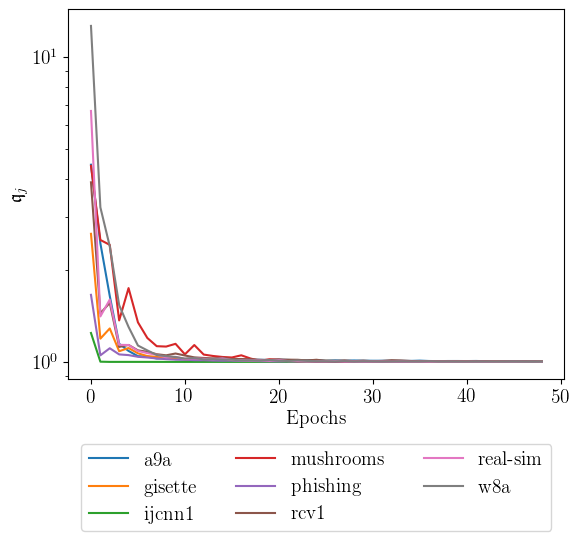

In [56]:
plot_regularity_ratios(results_dir, datasets, opt, precond, save_dir)